# Kuinka pitkään paneelivalmistajat ja asennusfirmat ovat toimineet alalla?


Paneelin valmistajan ja asentajan ensimmäisen tehtävän päivämäärä.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Ladataan data tiedostosta ja muutetaan '-9999' NaN:eiksi
url_src = "d:/aidaprojekti\LBNL_file.csv"
df = pd.read_csv(url_src, low_memory=False, na_values = '-9999')

# Muutetaan päivämäärät ja järjestetään sen mukaan
df['installation_date'] = pd.to_datetime(df['installation_date'])
df = df.sort_values(['installation_date'], ascending=True)


# Muutetaan nimet/kirjaimet isoiksi
df['module_manufacturer_1'] = df['module_manufacturer_1'].str.upper()
df['module_manufacturer_2'] = df['module_manufacturer_2'].str.upper()
df['module_manufacturer_3'] = df['module_manufacturer_3'].str.upper()
df['installer_name'] = df['installer_name'].str.upper()


# Otetaan jokainen tarvittava sarake ja päivämäärä
mod1 = df[['installation_date','module_manufacturer_1']]
mod2 = df[['installation_date','module_manufacturer_2']]
mod3 = df[['installation_date','module_manufacturer_3']]
inst = df[['installation_date','installer_name']]


# NaN:it pois
mod11 = mod1.dropna()
mod12 = mod2.dropna()
mod13 = mod3.dropna()
inst1 = inst.dropna()


# paneelin tekijän ja asentajan duplikaatit pois ja aikaisin päivämäärä mukaan
mod11 = mod11.drop_duplicates(subset=['module_manufacturer_1'])
mod12 = mod12.drop_duplicates(subset=['module_manufacturer_2'])
mod13 = mod13.drop_duplicates(subset=['module_manufacturer_3'])
inst1 = inst1.drop_duplicates(subset=['installer_name'])




Printataan 'module_manufacturer_1' päivämäärän mukaan, josta poistettu dublikaatit.

Paneeli valmistajien määrä on 317.

In [2]:
print(mod11)

       installation_date                  module_manufacturer_1
978707        1998-05-19                          KYOCERA SOLAR
200567        2001-12-12                             SOLARWORLD
865015        2002-03-31                           SCHOTT SOLAR
81090         2002-05-19                              EPV SOLAR
418549        2002-11-03                        ATLANTIS ENERGY
...                  ...                                    ...
126054        2019-08-15               NEXT ENERGY ALLIANCE LLC
63977         2019-09-03               MISSION SOLAR ENERGY LLC
110722        2019-09-20  SERAPHIM SOLAR USA MANUFACTURING INC.
224609        2019-11-01                   MUNDRA SOLAR PV LTD.
163           2019-12-23         MERLIN SOLAR TECHNOLOGIES, INC

[317 rows x 2 columns]


Printataan 'module_manufacturer_2' päivämäärän mukaan, josta poistettu dublikaatit.

Paneeli valmistajien määrä on 154.

In [3]:
print(mod12)

       installation_date        module_manufacturer_2
979692        2003-06-05                        SHARP
231645        2003-07-20                KYOCERA SOLAR
755054        2003-11-20                     BP SOLAR
113200        2004-02-11                 SCHOTT SOLAR
817459        2006-03-05          UNITED SOLAR OVONIC
...                  ...                          ...
594042        2019-05-07    MISSION SOLAR ENERGY LLC.
212519        2019-05-08       ONYX SOLAR ENERGY S.L.
128476        2019-11-13            SILFAB SOLAR INC.
234632        2019-11-19    HANSOL TECHNICS CO., LTD.
8969          2019-12-16  INTEGRATED SOLAR TECHNOLOGY

[154 rows x 2 columns]


Printataan 'module_manufacturer_3' päivämäärän mukaan, josta poistettu dublikaatit.

Paneeli valmistajien määrä on 72.

In [4]:
print(mod13)

       installation_date                    module_manufacturer_3
817459        2006-03-05                                 SUNPOWER
136291        2007-04-19                                PANASONIC
53548         2007-06-02                                    SHARP
383717        2007-11-29                      UNITED SOLAR OVONIC
220819        2008-03-27                             SCHOTT SOLAR
...                  ...                                      ...
851459        2019-02-19                                   SILFAB
271200        2019-04-24                       WESTINGHOUSE SOLAR
50991         2019-08-29                                  MIASOLE
463409        2019-11-14  LONGI GREEN ENERGY TECHNOLOGY CO., LTD.
8302          2019-12-02                            SUNPREME INC.

[72 rows x 2 columns]


Printataan 'installer_name' päivämäärän mukaan, josta poistettu dublikaatit.

Paneelienasentajien määrä on 4741.

In [5]:
print(inst1)

       installation_date        installer_name
154819        1998-04-10                  SELF
978707        1998-05-19          TESLA ENERGY
432587        1998-08-14   SUN LIGHT AND POWER
804389        1998-09-26  SIERRA SOLAR SYSTEMS
136542        1998-11-14     REAL GOODS SOLAR 
...                  ...                   ...
8485          2019-12-26   TARABINI MECHANICAL
847955        2019-12-26           HEATSPOTTER
10629         2019-12-26        CYRUSNTRACTORS
1788          2019-12-27     CHAMBERS ELECTRIC
7517          2019-12-30     SOMIS INVESTMENTS

[4741 rows x 2 columns]


Muutetaan paneelien valmistajat (sarakkeet 1,2,3) samaan sarakkeeseen 'module'.
Poistetaan dublikaatit

In [6]:
# Muutetaan module_manufacturer sarakkeiden nimet module:ksi
mod11[['installation_date','module']] = mod11[['installation_date','module_manufacturer_1']]
mod12[['installation_date','module']] = mod12[['installation_date','module_manufacturer_2']]
mod13[['installation_date','module']] = mod13[['installation_date','module_manufacturer_3']]

# Yhdistetään
modul1 = pd.concat([mod11[['installation_date','module']], mod12[['installation_date','module']], mod13[['installation_date','module']]],ignore_index=True)

# Päivämäärän mukaan sortattu
module = modul1.sort_values(['installation_date'], ascending=True)

# poistetaan duplikaatit
modulee = module.drop_duplicates(subset=['module'])



Printataan yhdistetty paneeli valmistajat päivämäärän mukaan.

Paneeli valmistajien määrä on kaiken kaikkiaan 321.

In [7]:
print("modulee::",modulee)

modulee::     installation_date                                 module
0          1998-05-19                          KYOCERA SOLAR
1          2001-12-12                             SOLARWORLD
2          2002-03-31                           SCHOTT SOLAR
3          2002-05-19                              EPV SOLAR
4          2002-11-03                        ATLANTIS ENERGY
..                ...                                    ...
312        2019-08-15               NEXT ENERGY ALLIANCE LLC
313        2019-09-03               MISSION SOLAR ENERGY LLC
314        2019-09-20  SERAPHIM SOLAR USA MANUFACTURING INC.
315        2019-11-01                   MUNDRA SOLAR PV LTD.
316        2019-12-23         MERLIN SOLAR TECHNOLOGIES, INC

[321 rows x 2 columns]


Printataan paneeli valmistajien mukaan järjestetty.

In [8]:
# paneelivalmistajan mukaan sortattu vain printtauksen takia
module1 = modulee.sort_values(['module'], ascending=True)
print("moduleee: ",module1)


moduleee:      installation_date                                             module
71         2010-09-12                                           1SOLTECH
248        2016-06-27                                A10GREEN TECHNOLOGY
273        2017-08-17                                        AAVID SOLAR
348        2010-01-19                                       ABOUND SOLAR
232        2015-09-22                                    ACCUSOLAR POWER
..                ...                                                ...
131        2012-01-13            ZHEJIANG GLOBAL PHOTOVOLTAIC TECHNOLOGY
182        2013-05-10                         ZHEJIANG JIUTAI NEW ENERGY
145        2012-04-03              ZHEJIANG KINGDOM SOLAR ENERGY TECHNIC
50         2010-02-03  ZHEJIANG SUNFLOWER LIGHT ENERGY SCIENCE & TECH...
430        2015-01-25                          ZNSHINE PV-TECH CO., LTD.

[321 rows x 2 columns]




Visualisointi 'uusia Paneeli valmistajia / vuosi'.

Kuvaajasta näkee miten uusia paneelien valmistajia on tullut markkinoille.
1998 - 2008 on ollut vain muutama uusi tullut vuodessa.
Sen jälkeen on valmistajien määrä noussut moninkertaiseksi per vuosi.

valmistaja:       installation_date                                 module
0                 1998                          KYOCERA SOLAR
1                 2001                             SOLARWORLD
2                 2002                           SCHOTT SOLAR
3                 2002                              EPV SOLAR
4                 2002                        ATLANTIS ENERGY
..                 ...                                    ...
308               2019       CHINT SOLAR (ZHEJIANG) CO., LTD.
305               2019              MISSION SOLAR ENERGY LLC.
316               2019         MERLIN SOLAR TECHNOLOGIES, INC
314               2019  SERAPHIM SOLAR USA MANUFACTURING INC.
313               2019               MISSION SOLAR ENERGY LLC

[321 rows x 2 columns]


C:\Users\Tehoton\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


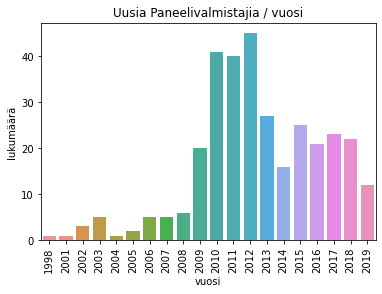

In [9]:

# VISUAALISOINTI 
# paneelivalmistaja: muutetaan vuosiksi ja sen mukaan sortattu
module1['installation_date'] = pd.to_datetime(module1['installation_date'], format='%d-%b-%Y %H:%M:%S') 
module1['installation_date'] = module1['installation_date'].dt.year
module1 = module1.sort_values(['installation_date'], ascending=True)

print("valmistaja: ",module1)


# Visualisointi paneelivalmistajat
sns.countplot(module1['installation_date'])
plt.title("Uusia Paneelivalmistajia / vuosi")
plt.xlabel('vuosi')
plt.ylabel('lukumäärä')
plt.xticks(rotation=90)
plt.show()






Visualisointi 'uusia Paneeli asentajia / vuosi'.

Kuvaajasta näkee miten uusia paneelien asentajia on tullut markkinoille.
Asentajien määrä on noussut huomattavasti vasta 2015 aikana. 

asentajat:          installation_date              installer_name
154819               1998                        SELF
978707               1998                TESLA ENERGY
432587               1998         SUN LIGHT AND POWER
804389               1998        SIERRA SOLAR SYSTEMS
136542               1998           REAL GOODS SOLAR 
...                   ...                         ...
77288                2019               JNBNSTRUCTION
162303               2019            PACE ENGINEERING
36015                2019  HASKIN MECHANICAL SERVICES
86382                2019      PATRIOTNSTRUCTION PROS
7517                 2019           SOMIS INVESTMENTS

[4741 rows x 2 columns]


C:\Users\Tehoton\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


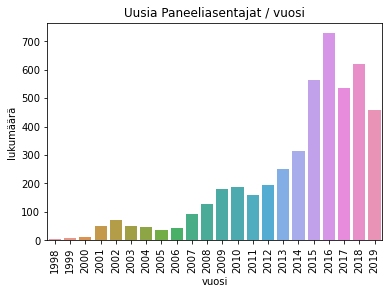

In [10]:
# paneeliasentajat: muutetaan vuosiksi ja sen mukaan sortattu
inst1['installation_date'] = pd.to_datetime(inst1['installation_date'], format='%d-%b-%Y %H:%M:%S') 
inst1['installation_date'] = inst1['installation_date'].dt.year
inst1 = inst1.sort_values(['installation_date'], ascending=True)

print("asentajat: ",inst1)


# Visualisointi paneeliasentajat
sns.countplot(inst1['installation_date'])
plt.title("Uusia Paneeliasentajat / vuosi")
plt.xlabel('vuosi')
plt.ylabel('lukumäärä')
plt.xticks(rotation=90)
plt.show()
